<img src="Archivos/miad4.png" width=800x> 

# Fundamentos de ciencia de datos utilizando el paquete scikit-Learn

Al desarrollar un proyecto de analítica de datos, queremos estudiar la existencia de relaciones entre variable. Por ejemplo, si tenemos una base de datos de estudiantes de una universidad, nos podría interesar encontrar alguna relación entre el promedio académico del estudiante y variables como la calidad del colegio donde estudió, si esta realizando doble programa, la cantidad de actividades extracurriculares que tiene, etc. Para esto, utilizamos modelos que nos permitan entender las relaciones que existen entre las variables estudiadas y predecir el comportamiento que tendrá una variable específica dependiendo del valor de las otras variables del sistema.

En este tutorial establecemos nociones fundamentales sobre el uso de la librería `sklearn` (scikit-learn) para integrarlas en procesos de análisis de datos.

## Requisitos
Para desarrollar este tutorial necesitarás: 
* Declarar y manipular objetos de tipo `DataFrame` en `pandas`.
* Crear visualizaciones en `matplotlib` y `seaborn`.

## Objetivos
Al final de este tutorial podrás:

**1.** Diferenciar los tipos de modelos de *machine learning* que ofrece el paquete scikit-learn y sus casos de uso comunes.<br>
**2.** Construir, entrenar y analizar los resultados de modelos básicos de *machine learning* en el paquete scikit-learn.

## 1. Modelos de *machine learning*

El propósito de los modelos de *machine learning* es encontrar características en datos conocidos (del pasado), ya sea para comprender algún fenómeno o para hacer alguna estimación sobre datos nuevos (del futuro). En cualquier caso, estos modelos son "entrenados" con base en datos observados.

Los modelos de *machine learning* comúnmente se clasifican en dos categorias: supervisados, los cuales cuentan con una variable de respuesta que se quiere predecir; no supervisados, los cuales se enfocan en encontrar relaciones subyacentes entre los datos sin necesidad de una variable de respuesta. Por ejemplo, si tenemos imágenes médicas acompañadas del diagnóstico de un profesional, quien indica si existe una patología o no, podriamos plantear un modelo de aprendizaje supervisado. Si clasificamos las observaciones en estas dos categorías (patología, no patología), podemos utilizarlas para "entrenar" nuestro modelo y posteriormente determinar, sin la ayuda del médico, si nuevas imágenes corresponden a la patología o no.

<br>
<img src="Archivos/taxo.png" width=650x>
<br>
<center><b>Figura 1:</b> taxonomía general de modelos de <i>machine learning</i>
</center>


El aprendizaje supervisado nos permite abordar dos tipos de problemas: regresión y clasificación. En los problemas de regresión el objetivo es predecir una variable de respuesta que toma valores continuos (p.ej., estimar el precio de una casa con base en sus características), mientras que en los problemas de clasificación el objetivo es predecir una variable de respuesta que toma valores discretos (p.ej., estimar si una imagen corresponde a un objeto u otro).

El aprendizaje no supervisado nos permite abordar dos tipos de problemas: clustering y reducción de dimensionalidad. En los problemas de clustering el objetivo es encontrar conjuntos de observaciones con características similares que podrían pertenecer a una misma clase o grupo. En los problemas de reducción de dimensionalidad el objetivo es encontrar las características que representan la información relevante de un conjunto de datos de la manera más concisa.

### 1.1. Pasos típicos para desarrollar un modelo en el paquete scikit-learn

Scikit-learn es un paquete que provee implementaciones eficientes de muchos algoritmos comunes de *machine learning* con una API (interfaz de programación de aplicaciones) sencilla de utilizar. En general, llevamos a cabo los siguientes pasos al momento de crear un modelo:

**1. Importar un módulo del paquete `sklearn` que contiene el modelo que vamos a utilizar:** por ejemplo, si queremos desarrollar un modelo de regresión lineal, debemos importar el módulo correspondiente: `linear_model`.
~~~ python
from sklearn import linear_model
~~~

**2. Elegir los datos que queremos analizar:** en general, podemos pensar en los datos de entrada de un modelo de *machine learning* como una matriz, que llamaremos $X$, con $m$ filas y $n$ columnas, donde $m$ corresponde al número de muestras u observaciones (*samples*) y $n$ corresponde al número de variables o características (*features*). En el caso de modelos no supervisados, esa matriz será suficiente. Para un modelo supervisado, requerimos una columna adicional de datos, $y$ (con $m$ filas, una por muestra), correspondientes a la variable de respuesta. Supongamos que contamos con un `DataFrame` (`DF`) en el que las columnas 0 a 4 son variables independientes (*features*) y la columna 5 es la variable de respuesta. La selección de datos para la regresión será:
~~~python
X = DF.iloc[:,:5]
y = DF.iloc[:,5]
~~~

**3. Crear conjuntos de datos para entrenamiento y prueba:** luego de dividir los datos en $X$ y en $y$, debemos crear un conjunto de datos de entrenamiento, con el cual se entrenará el modelo, y un conjunto de datos de prueba, con el cual se verificará la efectividad del modelo. Es fundamental llevar a cabo este paso ya que, de lo contrario, estaríamos entrenando y probando al modelo con el mismo set de datos, lo cual no nos permitiría saber si el modelo funciona correctamente o si simplemente se “aprendió” los resultados óptimos. Una analogía útil al momento de pensar en esta situación es la de un profesor que le muestra las respuestas de un parcial a sus estudiantes y luego los evalúa con las mismas preguntas. Normalmente utilizamos el 80% de los datos para entrenar el modelo y el 20% para probarlo.
~~~python
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
~~~

**4. Declarar una instancia del modelo:** cada módulo dispone de diversos modelos. Por ejemplo, dentro de `linear_model` podemos encontrar la clase `LinearRegression`, que contiene los elementos necesarios para desarrollar un modelo de regresión lineal. Para proceder, debemos declarar un objeto de la clase `LinearRegression` como se muestra a continuación.
~~~python
mi_modelo = linear_model.LinearRegression()
~~~

**5. Entrenar el modelo:** el objeto `mi_modelo` cuenta con los métodos y atributos necesarios para desarrollar un modelo de regresión. El método más común en los modelos de *machine learning* es `fit`, pues es el encargado de entrenar el modelo de acuerdo a los datos suministrados para encontrar los parámetros que mejor se ajustan. A contiuación vemos la instrucción para entrenar el modelo:
~~~python
mi_modelo.fit(X_train,y_train)
~~~

**6. Consultar los resultados del modelo:** en el caso del modelo de regresión lineal, nos interesa conocer los coeficientes que acompañan a cada una de las variables del modelo. Cuando ejecutamos el método `fit`, estos valores son almacenados en el atributo `coef_`; el caracter ( _ ) es una convención para los atributos calculados internamente por el método `fit`. Así, podemos consultar estos valores de la siguiente manera:
~~~python
print(mi_modelo.coef_)
~~~

**7. Utilizar el modelo para predecir:** por lo general, queremos aplicar nuestro modelo entrenado a nuevas observaciones de datos. Para esto utilizamos el método `predict`, que recibe por parámetro las columnas correspondientes a variables independientes ($X$) y genera las predicciones correspondientes para la variable de respuesta ($y$). A continuación, utilizamos los datos de prueba (`X_test`) para predecir la variable de respuesta.
~~~python
y_estimado = mi_modelo.predict(X_test)
~~~

**8. Evaluar el desempeño del modelo:** es importante asegurarnos que el modelo que hemos entrenado se desempeña bien con datos nuevos y no se ha sobreajustado con los datos de entrenamiento. En este caso, lo usual es medir qué tan cercanas son las predicciones hechas por el modelo (`y_estimado`) a los valores reales de la variable de respuesta de los datos de prueba (`y_test`). En el caso de la regresión lineal, una métrica común es el $R^2$, el cual puede ser calculado con el método `r2_score` del módulo `sklearn.metrics`. Procedemos a importar la funcion y estimar la métrica:
~~~python
from sklearn.metrics import r2_score
mi_r2 = r2_score(y_test, y_estimado)
~~~

También podemos usar el método `score` para conocer la precisión del modelo a partir de los datos de prueba:
~~~python
mi_r2 = mi_modelo.score(X_test, y_test)
~~~  

## 2. Modelos de regresión
Un modelo de regresión es un modelo matemático que busca determinar la relación de una variable dependiente $Y$ con respecto a una o más variables independientes $X$. Para ello debemos postular una ecuación que relacione estas variables. Por ejemplo, queremos saber si el rendimiento de un producto químico está relacionado con su temperatura. Podemos construir un modelo de regresión para identificar la relación que existe entre las variables y predecir el rendimiento de un producto dada una temperatura.

Veremos tres tipos de modelos de regresión:
1.	Regresión lineal simple
2.	Regresión múltiple
3.	Regresión logística

En este tutorial veremos cómo implementar estos modelos en el contexto de analítica de datos sin explicar su trasfondo estadístico, veremos esta explicación en otros cursos de la Maestría.

### 2.1. Regresión lineal simple

Una regresión lineal simple se basa en una sola variable independiente $X$, una variable dependiente $y$ y supone que existe una relación lineal entre estas. La ecuación general para este tipo de regresión es la siguiente:$$y = β_0 + β_1X + e$$

+ $β_0$ es la altura a la que la recta corta al eje Y, la cual se denomina término independiente.

+ $β_1$ es el incremento que se produce en la variable $y$ cuando la variable $X$ aumenta una unidad, el cual se denomina pendiente de la recta.

<a id='ej1'></a>
##### Ejemplo 1
En este ejemplo utilizaremos los datos de vivienda en Boston y seguiremos los pasos vistos anteriormente, para llevar a cabo una regresión lineal que nos permita identificar cuál es la relación entre el precio de venta de una casa y el número de habitaciones que tiene.

Empecemos cargando los datos y filtrando la información relevante:

In [8]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

# Importamos los datos
data_boston = datasets.load_boston()

# Creamos un DataFrame para visualizarlos
df = pd.DataFrame(data = data_boston.data, columns = data_boston.feature_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [16]:
# Elegimos los datos que queremos analizar

# Definimos la variable independiente como el número de habitaciones (columna 5 de los datos)
X = data_boston.data[:, np.newaxis, 5]

# Definimos la variable de respuesta utilizando el atributo target del dataset de sklearn
y = data_boston.target

Ahora, visualicemos los datos para darnos una idea de si existe una relación lineal entre las variables.

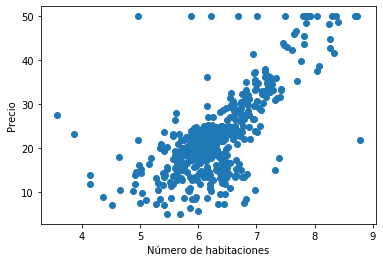

In [14]:
# Graficamos los datos correspondientes
plt.scatter(X, y)
plt.xlabel('Número de habitaciones')
plt.ylabel('Precio')
plt.show()

Después, creamos el modelo de regresión siguiendo los pasos vistos anteriormente:

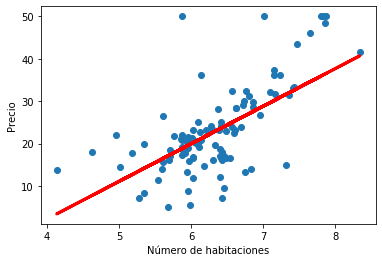

In [20]:
from sklearn.model_selection import train_test_split

# Creamos conjuntos de datos para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Declaramos una instancia del modelo
lr = linear_model.LinearRegression()

# Entrenamos el modelo
lr.fit(X_train, y_train)

# Utilizamos el modelo para predecir
y_estimado = lr.predict(X_test)

# Graficamos los datos y las predicciones hechas por el modelo
plt.scatter(X_test, y_test)
plt.plot(X_test, y_estimado, color='red', linewidth=3)
plt.xlabel('Número de habitaciones')
plt.ylabel('Precio')
plt.show()

Como podemos ver, parece que el modelo de regresión se ajusta bien a los datos de vivienda de Boston. Para comprobarlo, evaluemos el desempeño del modelo:

In [21]:
lr.score(X_test, y_test)

0.45484052744072845

El desempeño del modelo no es muy alto. Esto nos indica que, aunque a simple vista pareciera que el número de habitaciones es suficiente para estimar el precio de una vivienda, es probable que necesitemos considerar más variables con el fin de encontrar una mejor aproximación del precio de una casa.

### 2.2. Regresión lineal múltiple

Una regresión lineal múltiple es el caso de una regresión lineal simple con múltiples variables independientes $X$. La ecuación general para este tipo de regresión es la siguiente:$$y = β_0 + β_1X_1 + β_2X_2 + ... + β_nX_n + e$$

El objetivo de este tipo de regresión es incorporar la información de varias variables para explicar conjuntamente el comportamiento de la variable de respuesta.

##### Ejemplo 2.
Retomemos el [Ejemplo 1](#ej1). Esta vez queremos predecir el precio de una casa a partir de múltiples variables. Para esto usaremos todas las variables que existen en el set de datos de vivienda de Boston. Entre estas variables encontramos el número de habitaciones de la vivienda, número de crímenes en el área cercana, costo de impuestos, y algunas más.

De este modo, empezaremos cargando el set de datos y separando la variable de interes de las otras variables:

In [23]:
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

#Importamos los datos
data_boston = datasets.load_boston()

# Elegimos los datos que queremos analizar

# Definimos todas las variables como variables independientes
X = data_boston.data

# Definimos la variable de respuesta utilizando el atributo target del dataset de sklearn
y = data_boston.target

Luego, debemos crear el modelo de la misma manera que en la regresión lineal simple.

In [24]:
from sklearn.model_selection import train_test_split

# Creamos conjuntos de datos para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Declaramos una instancia del modelo
lr = linear_model.LinearRegression()

# Entrenamos el modelo
lr.fit(X_train, y_train)

# Utilizamos el modelo para predecir
y_pred = lr.predict(X_test)

Finalmente, evaluemos el desempeño del modelo:

In [26]:
lr.score(X_test, y_test)

0.7396309002235383

Como podemos observar, el modelo obtuvo una precisión mucho mayor que cuando solo se usó el número de habitaciones. A partir de este resultado, podemos concluir que el precio de una casa en Boston puede ser explicado conjuntamente por numerosos factores y no por uno en particular.

### 2.3. Regresión logística

Una regresión logística se basa en una una o varias variables independientes $X$ y una variable dependiente $y$. La variable $y$ es binaria y nos permite resolver problemas de clasificación en los cuales queremos determinar si un registro pertenece a una categoría u otra. Por ejemplo, si quisieramos determinar si una fruta es una manzana o una pera dadas sus características, podríamos usar una regresión logística para calcular la probabilidad de que esta sea una manzana o una pera.

<img src="Archivos/logistica.png" alt="Drawing" style="width: 540px;"/>

##### Ejemplos de situaciones que se pueden resolver con regresión logística: 
+ Determinar la probabilidad de que una persona reciba o no un crédito.
+ Determinar la probabilidad de que un estudiante sea admitido o no en una universidad.
+ Determinar la probabilidad de que un paciente tenga una enfermedad o no


##### Ejemplo 3
Calculemos la probabilidad de que una persona sea admitida en una prestigiosa universidad dado su puntaje en la prueba GMAT, su promedio del pregrado y sus años de experiencia laboral. Si la persona fue admitida, la variable de respuesta la clasificará con el número 1; de lo contrario, la variable tomará el valor de 0. Comenzaremos cargando los datos.

In [2]:
import pandas as pd
datos = pd.read_excel("Archivos/datosLogistica.xlsx")
datos.head(10)

,Admitido,GMAT,Promedio,Experiencia
0,1,780,4.0,3
1,1,750,3.9,4
2,0,690,3.3,3
3,1,710,3.7,5
4,0,680,3.9,4
5,1,730,3.7,6
6,0,690,2.3,1
7,1,720,3.3,4
8,1,740,3.3,5
9,0,690,1.7,1


Después de cargar los datos debemos separar la variable de interés, es decir si fue admitido o no, del resto de las variables:

In [4]:
# Elegimos los datos que queremos analizar

# Definimos todas las variables como variables independientes
X = datos[["GMAT", "Promedio", "Experiencia"]]

# Definimos la variable de respuesta
y = datos[["Admitido"]]

Ahora, crearemos el modelo de regresión logística:

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Creamos conjuntos de datos para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Declaramos una instancia del modelo
lr = LogisticRegression()

# Entrenamos el modelo
lr.fit(X_train, y_train)

# Utilizamos el modelo para predecir
y_pred = lr.predict(X_test)

C:\Users\Camilo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Camilo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Finalmente, verificaremos la precisión del modelo:

In [7]:
lr.score(X_test, y_test)

0.625

Como podemos ver, el modelo acierta más del 60% de las veces, lo cual nos indica que es probable que estás variables sean pertinentes al momento de predecir si una persona ingresará a una universidad prestigiosa. Sin embargo, se deben tener en cuenta más variables en el modelo para aumentar su precisión.

## 3. Ejemplos de modelos comunes de *machine learning*

Los siguientes ejemplos corresponden a una adaptación del material del libro *Python Data Science Handbook: Essential Tools for Working with Data* de Jake VanderPlas. Son ejemplos ampliamente usados en documentación y no corresponden a implementaciones originales, salvo explicaciones agregadas.

### 3.1. Un ejemplo de clasificación para los datos Iris

#### El conjunto de datos Iris (contenido en el paquete Seaborn)

El conjunto de datos Iris contiene observaciones de diferentes especies de flores. Para cada observación, se tiene la longitud y ancho de sus sépalos, así como la longitud y ancho de sus pétalos. Adicionalmente, se cuenta con una etiqueta que representa la especie de cada flor.

In [9]:
import seaborn as sns

iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Exploración visual con Seaborn

Al pasar la columna "species" al parámetro "hue" del método pairplot obtenemos una visualización diferenciada con dispersiones separadas por color.

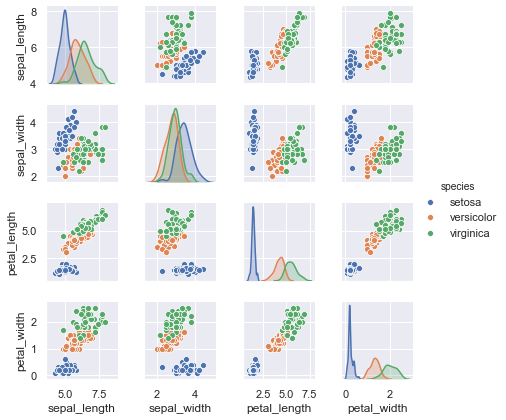

In [10]:
sns.pairplot(iris, hue = 'species', height = 1.5)

#### Variables independientes
La longitud y ancho de sus sépalos y pétalos.

In [12]:
X_iris = iris.drop('species', axis = 1)
X_iris.shape

(150, 4)

#### Variable dependiente
Etiqueta que representa la especie de cada flor.

In [13]:
y_iris = iris['species']
y_iris.shape

(150,)

#### Crear el modelo de clasificación

In [16]:
from sklearn.model_selection import train_test_split

# Creamos conjuntos de datos para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris,
                                                random_state=1)

Uno de los modelos más sencillos y comunes de clasificación es el *Gaussian naive Bayes classifier* y, aunque la discusión de la lógica del modelo excede el alcance de este tutorial, su implementación en el paquete scikit-learn es muy sencilla. Por esta razón, lo usaremos a manera de caja negra con el propósito de ilustrar el potencial de este paquete.

In [19]:
from sklearn.naive_bayes import GaussianNB 

# Declaramos una instancia del modelo
model = GaussianNB()

# Entrenamos el modelo
model.fit(X_train, y_train)

# Utilizamos el modelo para predecir
y_pred = model.predict(X_test)

Por último, evaluamos el desempeño del modelo. Recurramos al módulo `metrics` para importar la función `accuracy_score`.

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9736842105263158

En este caso, obtenemos un desempeño superior al 97%, el cual es sorprendentemente alto, pues en la práctica es difícil lograr tal nivel de ajuste.

### 3.2 Análisis de Componentes Principales

El análisis de componentes principales, frecuentemente usado en reducción de dimensionalidad, consiste en encontrar las direcciones en las que se encuentra la mayor variabilidad del conjunto de datos con base en sus valores y vectores propios. La discusión del método en profundidad excede el alcance de este tutorial, pero su implementación con el paquete scikit-learn es sencilla. En este caso, tenemos cuatro variables independientes y queremos reducir esas dimensiones a dos, por lo cual aplicaremos el método indicando que nos interesan dos componentes principales.

In [17]:
from sklearn.decomposition import PCA  # 1. Elegir el modelo deseado de la clase correspondiente en Scikit Learn

model = PCA(n_components=2)            # 2. Instanciar el modelo (con los hiper-parámetros deseados; 
                                       #    en este caso, queremos dos de las componentes principales)
model.fit(X_iris)                      # 3. Ajustar el modelo (basta con incluir X)
X_2D = model.transform(X_iris)         # 4. Transformar el modelo a dos dimensiones 
                                       # (se usa transformar en lugar de predecir por el tipo de modelo en cuestión)

Mediante PCA, cambiamos el espacio de variables. En lugar de expresar el problema en términos de las cuatro variables correspondientes a las medidas de los sépalos y pétalos, lo expresamos en función de dos variables auxiliares (`"PCA1"` y `"PCA2"`) que no hacen parte del conjunto de variables originales sino que responden a alguna combinación de ellas.

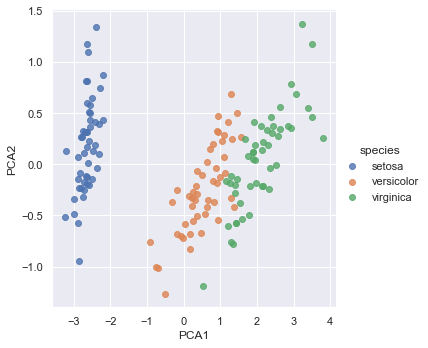

In [18]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

### 3.3 Modelo de *clustering* para Iris

Los modelos de clustering buscan encontrar grupos "naturales" en el conjunto de datos. Un modelo común es el modelo de mezcla Gaussiana (GMM: Gaussian Mixture Model), al cual debe pasársele como parámetro el número de *clusters* o grupos que se desean.

In [20]:
from sklearn.mixture import GaussianMixture as GMM # 1. Importar el modelo deseado a partir de la clase respectiva
model = GMM(n_components=3,
            covariance_type='full')  # 2. Instanciar el modelo con parámetros deseados
model.fit(X_iris)                    # 3. Entrenar (no hace falta Y por ser modelo no supervisado)
y_gmm = model.predict(X_iris)        # 4. Determinar los grupos o clusters

Finalmente, nos interesa visualizar los resultados. Como el problema original está en cuatro dimensiones y no podríamos graficarlo, optamos por graficarlo en una proyección a dos variables, aprovechando que ya contábamos con una transformación a dos variables a partir del ejercicio de componentes principales.

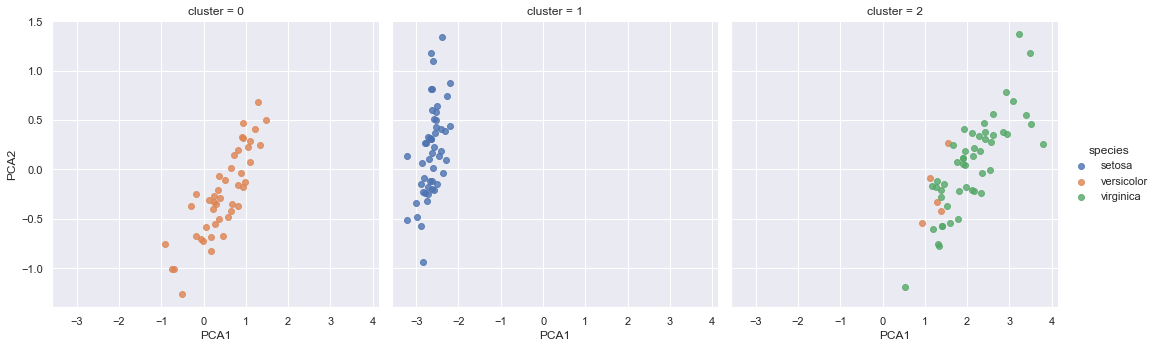

In [21]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data = iris, hue = 'species',
           col = 'cluster', fit_reg = False);

## Material adicional

* scikit-learn org. (2020). Machine Learning in Python. 2 de Diciembre de 2020, de scikit-learn Sitio web: https://scikit-learn.org/stable/

## Referencias

*  J. VanderPlas (2016) *Python Data Science Handbook: Essential Tools for Working with Data* O'Reilly Media, Inc.
*  scikit-learn developers . (2020). Demo of DBSCAN clustering algorithm. 11 Diciembre 2020, de scikit-learn Sitio web: https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py

## Créditos

__Autor(es)__: Camilo Hernando Gomez Castro, Ariadna de Ávila, Camilo Falla Moreno, Juan David Reyes, Diego Alejandro Cely Gómez

__Fecha última actualización__: 01/09/2021